In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
myfont = fm.FontProperties(fname='simsun.ttc')

<IPython.core.display.Javascript object>


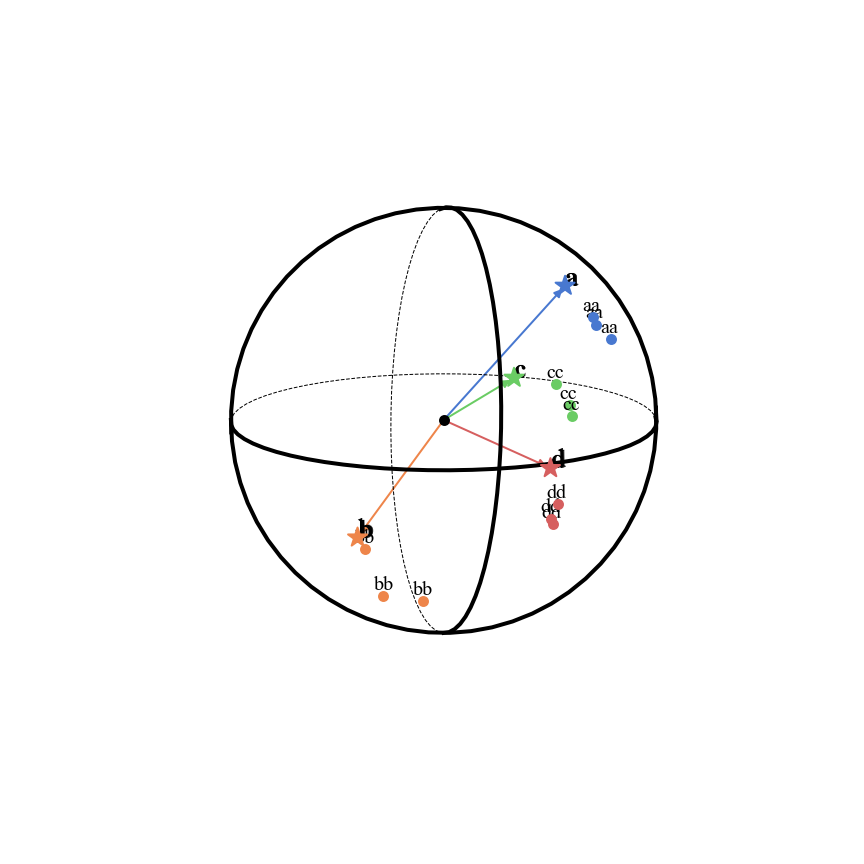

In [18]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

import re, seaborn as sns
import numpy as np

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn.manifold import TSNE
import numpy as np
from numpy import *
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

import math
from math import atan

# -87 ， 4
num_clusters = 2

import random
random.seed(666)
line_color = sns.color_palette("muted", 4).as_hex()
def noisy_arrow(x, y, z):
    
    return x+0.3*random.random(), y+0.3*random.random(), z-0.3*random.random()
    


def draw_vectors(embeddings, ):
    """
    args:
        embedding: [num_nodes, hidden_size]
    return:
        x, y, z: [num_nodes, 1]
    """
    embeddings = transform(embeddings) #[num_nodes, 3]
    
    return embeddings[:,0], embeddings[:,1], embeddings[:,2]
    
dir_est = (2.9,1.5,0.1)
    
    
def transform(X):
    # word + label word
    n_components = 3
    tsne = TSNE(n_components=n_components, random_state=111111, perplexity=4)
    Y = tsne.fit_transform(X)
    return Y

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)
n = 4
plt.rcParams['font.family'] = ['Times New Roman'] 

t = np.random.uniform(1, 55, size=n)
x = np.random.uniform(-1,1,size=4)
y = np.random.uniform(-1,1,size=4)
z = np.random.uniform(-1,1,size=4)

# x, y, z = draw_vectors(embeddings)

temp = ["*", ".", ".","."]

m = temp * num_clusters
idx = [0,1,2,3]
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("muted", 4).as_hex())
# cmap = ListedColormap([(1, 0, 0.),(1,0,0),(0, 0.5, 0),(0, 0.5, 0),(0, 0, 1),(0,0,201/255)])


def draw_3d_vector(x,y,z,ax, color="r"):
    a = Arrow3D([0, x], [0, y], 
                [0, z],mutation_scale=8,
                lw=1, arrowstyle="-|>", color=color)
    ax.add_artist(a)



relation_name = [ "a","b","c","d"]
token_name = [["aa","aa","aa"],["bb","bb","bb"],["cc","cc","cc"], ["dd","dd","dd"]]

def mscatter(x,y,z, ax=None, m=None, **kw):
    cnt = 0
    ax.scatter3D(0,0,0,marker="o", color="black")
    total_p = []
    total_name = []
    for xx, yy, zz in zip(x,y,z):
        t = (xx*xx+yy*yy+zz*zz)**0.5
        x[cnt] = x[cnt] / t
        y[cnt] = y[cnt] / t
        z[cnt] = z[cnt] / t
        draw_3d_vector(x[cnt],y[cnt],z[cnt],ax, color=line_color[cnt])
        
        for i in range(3):
            # 画三个点
            a,b,c = noisy_arrow(x[cnt],y[cnt],z[cnt])
#             draw_3d_vector(a,b,c,ax)
            
            p = ax.scatter3D(a,b,c,marker="o", color=line_color[cnt])
            total_p.append(p)
            nnn = token_name[cnt][i]
            
            ax.text(a-0.05,b,c+0.03, token_name[cnt][i],"x", fontsize=10)
            total_name.append(token_name[cnt][i])
            
        ax.text(x[cnt],y[cnt],z[cnt], relation_name[cnt], 'x', fontsize=14)
        t1,t2,t3 = x[cnt], y[cnt], z[cnt]


            
        ax.text(t1,t2,t3, relation_name[cnt], dir_est, fontsize=14, weight="bold")
        cnt += 1
        
    import matplotlib.markers as mmarkers
    ax = ax or plt.gca()
    sc = ax.scatter(x,y,z,**kw)
    if (m is not None) and (len(m)==len(x)):
        paths = []
        for marker in m:
            if isinstance(marker, mmarkers.MarkerStyle):
                marker_obj = marker
            else:
                marker_obj = mmarkers.MarkerStyle(marker)
            path = marker_obj.get_path().transformed(
                        marker_obj.get_transform())
            paths.append(path)
        sc.set_paths(paths)
    return sc





# ax.scatter(1,2,3)
# u, v = np.mgrid[0:2*np.pi:40j, 0:2*np.pi:40j]


u = np.arange(0,1*np.pi+0.1,0.1)
v = np.arange(np.pi,2*np.pi+0.1,0.1)
x1 = np.cos(u) 
y1 = np.sin(u) 
z1 = [t*np.sin(np.pi/12) for t in y1]
y1 *= np.cos(np.pi/12)
ax.plot3D(x1,y1,z1,"--k",linewidth=0.5)

x1 = np.cos(v) 
y1 = np.sin(v) 
z1 = [t*np.sin(np.pi/12) for t in y1]
y1 *= np.cos(np.pi/12)
ax.plot3D(x1,y1,z1,"-k", lw=2)
# u = np.arange(0,2*np.pi+0.1,0.1)
x1 = np.cos(u)
y1 = [0 for x in x1]
z1 = np.sin(u)
ax.plot3D(x1,y1,z1, "-k", lw=2)
# u = np.arange(0,2*np.pi+0.1,0.1)
x1 = np.cos(v)
y1 = [0 for x in x1]
z1 = np.sin(v)
ax.plot3D(x1,y1,z1, "-k", lw=2)
z1 = np.cos(u)
y1 = np.sin(u) 
x1 = [-1*x*np.sin(np.pi/12) for x in y1]
y1 *= np.cos(np.pi/12)
ax.plot3D(x1,y1,z1,"--k", linewidth=0.5)
z1 = np.cos(v)
y1 = np.sin(v)
x1 = [-1*x*np.sin(np.pi/12) for x in y1]

ax.plot3D(x1,y1,z1,"-k", lw=2)


ax.get_yaxis().set_visible(False)
# x 轴不可见
ax.get_xaxis().set_visible(False)
ax.get_zaxis().set_visible(False)
plt.axis('off')
ax.view_init(elev=-2,azim=-90)

sc = mscatter(x, y, z,ax=ax, m=m, s=100, c=idx, marker='*', cmap=cmap, alpha=1)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.savefig("result.png", dpi=1000)